In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import pandas as pd
import numpy as np
import ternary
import os

In [2]:
# plt.style.use('/home/dakota/Code/evaluate-icat/src/configs/figures.mplstyle')

In [3]:
df = pd.read_csv('data/tian_obs.csv', index_col=0)

In [4]:
# mixture_sizes
size_df = df.groupby('mixture').agg(
                 H1975=('H1975', 'mean'),
                 H2228=('H2228', 'mean'),
                 HCC827=('HCC827', 'mean'),
                 size=('mixture', 'size'))

In [5]:
size_df.sort_values(by='size', ascending=False).iloc[:10, ].index

Index(['9,0,0', '0,0,9', '0,9,0', '3,3,3', '2,2,5', '1,1,7', '1,7,1', '7,1,1',
       '5,2,2', '2,5,2'],
      dtype='object', name='mixture')

In [6]:
lines = ["H1975", "H2228", "HCC827"]

In [7]:
size_dict = {tuple(size_df.loc[x, lines].values): size_df.loc[x, "size"]\
             for x in size_df.index}
size_dict

{(0, 0, 9): 151,
 (0, 1, 8): 16,
 (0, 2, 7): 16,
 (0, 3, 6): 20,
 (0, 4, 5): 15,
 (0, 5, 4): 13,
 (0, 6, 3): 16,
 (0, 7, 2): 14,
 (0, 8, 1): 10,
 (0, 9, 0): 120,
 (1, 0, 8): 20,
 (1, 1, 7): 69,
 (1, 7, 1): 66,
 (1, 8, 0): 16,
 (2, 0, 7): 20,
 (2, 2, 5): 80,
 (2, 5, 2): 62,
 (2, 7, 0): 17,
 (3, 0, 6): 19,
 (3, 3, 3): 115,
 (3, 6, 0): 20,
 (4, 0, 5): 13,
 (4, 5, 0): 16,
 (5, 0, 4): 18,
 (5, 2, 2): 63,
 (5, 4, 0): 16,
 (6, 0, 3): 19,
 (6, 3, 0): 9,
 (7, 0, 2): 16,
 (7, 1, 1): 64,
 (7, 2, 0): 16,
 (8, 0, 1): 16,
 (8, 1, 0): 20,
 (9, 0, 0): 190}

In [8]:
all_mixtures = df[lines].drop_duplicates().values

In [9]:
all_mixtures

array([[7, 0, 2],
       [0, 0, 9],
       [7, 2, 0],
       [0, 5, 4],
       [0, 3, 6],
       [0, 2, 7],
       [0, 1, 8],
       [0, 4, 5],
       [0, 8, 1],
       [0, 7, 2],
       [0, 6, 3],
       [1, 0, 8],
       [0, 9, 0],
       [1, 1, 7],
       [1, 7, 1],
       [2, 2, 5],
       [2, 0, 7],
       [1, 8, 0],
       [2, 5, 2],
       [2, 7, 0],
       [3, 3, 3],
       [3, 0, 6],
       [3, 6, 0],
       [5, 2, 2],
       [5, 0, 4],
       [4, 5, 0],
       [4, 0, 5],
       [6, 0, 3],
       [5, 4, 0],
       [7, 1, 1],
       [6, 3, 0],
       [9, 0, 0],
       [8, 1, 0],
       [8, 0, 1]])

In [10]:

actual = [(9, 0, 0), (0, 9, 0), (0, 0, 9), (3, 3, 3)]

In [11]:
actual

[(9, 0, 0), (0, 9, 0), (0, 0, 9), (3, 3, 3)]

In [12]:
left_corner = plt.get_cmap('Blues')
right_corner = plt.get_cmap("Reds")
top_corner = plt.get_cmap('Greens')
cmaps = [plt.get_cmap('Blues'), plt.get_cmap("Reds"), plt.get_cmap('Greens')]

In [13]:
from matplotlib import colors as mcolors
def color_point(point, scale):
    point = np.array(point, dtype=float)
    assert point.size == 3
    scaled = (point) / scale
#     cmaps = [sns.light_palette("blue", as_cmap=True),
#              sns.light_palette("salmon", as_cmap=True),
#              sns.light_palette("seagreen", as_cmap=True)] #plt.get_cmap("Reds"), plt.get_cmap('Greens')]
    
    cmaps = [plt.get_cmap('Blues'), plt.get_cmap("Reds"), plt.get_cmap('Greens')]
    rgba = np.array([cmap(p) for cmap, p in zip(cmaps, scaled)])
    out = (np.median(rgba, axis=0)) * np.hstack((scaled, [1])) 
#     out = np.median(rgba, axis=0)
    out[-1] = 1.0
    return mcolors.to_rgb(out)
#     return out

In [14]:
def generate_heatmap_data(scale=5):
    from ternary.helpers import simplex_iterator
    d = dict()
    for (i, j, k) in simplex_iterator(scale):
        d[(i, j, k)] = color_point(np.array([i, j, k]), scale)
    return d

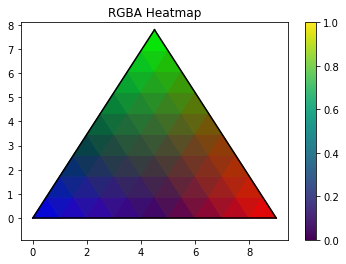

In [15]:
scale = 9
hm_data = generate_heatmap_data(scale)
figure, tax = ternary.figure(scale=scale)
tax.heatmap(hm_data, use_rgba=True)
tax.boundary()
tax.set_title("RGBA Heatmap")
plt.show()

In [16]:
# colors = np.array([color_point(p, 9) for p in all_mixtures])
figdir = os.path.join('figures', 'ternary')
if not os.path.exists(figdir):
    os.makedirs(figdir)

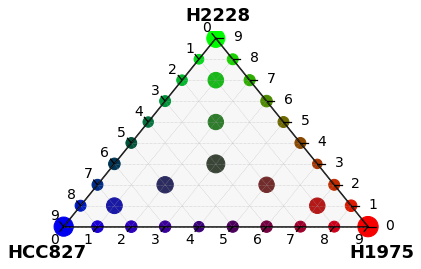

In [17]:
figure, tax = ternary.figure(scale=9)
colors = [color_point(x, 9) for x in all_mixtures]
sizes = [np.sqrt(size_dict[tuple(x)]) * 30 for x in all_mixtures]
tax.scatter(all_mixtures,
            c=colors,
            s=sizes,
            alpha=1.0)
tax.boundary(scale=scale)
tax.gridlines(multiple=1, c='#AAAAAA')
# tax.gridlines(multiple=1, linewidth=1.25,
#               horizontal_kwargs={'color': color_point([0, 9, 0], 9)},
#               right_kwargs={'color': color_point([0, 0, 9], 9)},
#               left_kwargs={'color': color_point([9, 0, 0], 9)})
tax.left_corner_label('HCC827', position=[0.02, -0.05, 0],
                      fontsize=18,
                      fontweight='bold')
tax.top_corner_label('H2228', position=[-0.10, 1.21, 0],
                     fontsize=18,
                     fontweight='bold')
tax.right_corner_label('H1975', position=[1.02, -0.05, 0],
                       fontsize=18,
                       fontweight='bold')
tax.get_axes().axis('off')
tax.ticks(axis='lbr', multiple=1, offset=0.025, fontsize=14,
          linewidth=1.25)
# tax.set_ticklabels(fontweight='bold')
tax.clear_matplotlib_ticks()
plt.savefig(os.path.join(figdir, 'all_mixtures.svg'), bbox_inches='tight')
tax.show()

In [40]:
total = sum([size_dict[x] for x in actual])
size_dict_actual = {k: v / total for k,v in size_dict.items() if k in actual}

In [44]:
size_dict_actual

{(0, 0, 9): 0.2621527777777778,
 (0, 9, 0): 0.20833333333333334,
 (3, 3, 3): 0.1996527777777778,
 (9, 0, 0): 0.3298611111111111}

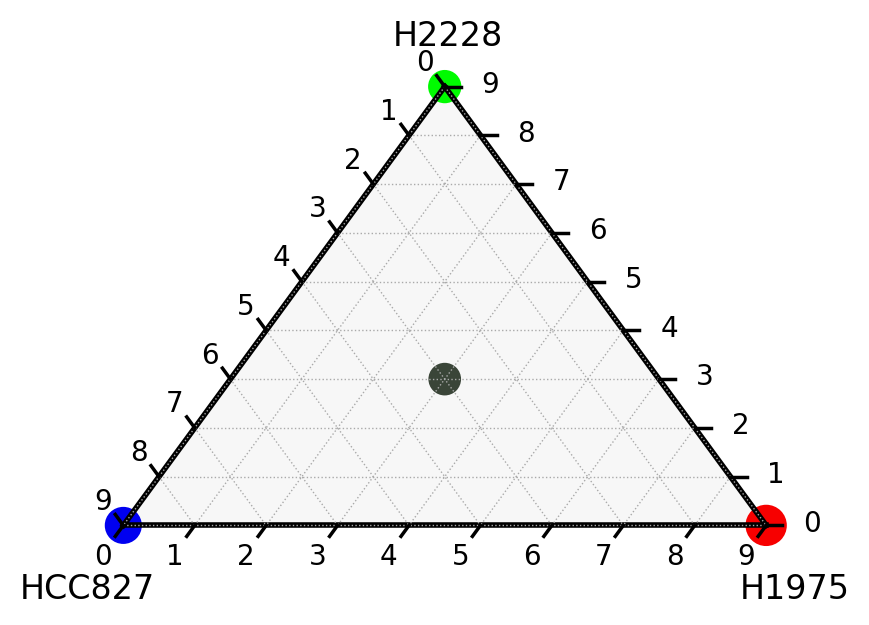

In [53]:
import seaborn as sns
rc = {"xtick.major.pad": 0,
      "ytick.major.pad": 0,
      "xtick.major.size": 0,
      "xtick.minor.size": 0,
      "ytick.major.size": 0,
      "ytick.minor.size": 0,
      "lines.linewidth": 2,
      "figure.subplot.left": 0.08,
      "figure.subplot.right": 0.95,
      "figure.subplot.bottom": 0.07,
      "figure.subplot.wspace": 0.25,
      "figure.subplot.hspace": 0.25,
      "legend.labelspacing": 0,
      "legend.handletextpad": 0,
      "legend.columnspacing": 0,
      "font.family": "sans-serrif"}
with sns.plotting_context("paper", font_scale=1.25, rc=rc):
    fig, ax = plt.subplots(figsize=(4,3), dpi=200)
    figure, tax = ternary.figure(scale=9, ax=ax)
    colors = [color_point(x, 9) for x in actual]
    sizes = [size_dict_actual[tuple(x)] * 600 for x in actual]
    tax.boundary(scale=scale)
    tax.gridlines(multiple=1, c='#AAAAAA')
#     tax.gridlines(multiple=1, linewidth=1.25,
#                   horizontal_kwargs={'color': color_point([0, 9, 0], 9)},
#                   right_kwargs={'color': color_point([0, 0, 9], 9)},
#                   left_kwargs={'color': color_point([9, 0, 0], 9)})
    tax.left_corner_label('HCC827', position=[0.02, -0.05, 0],
                          fontsize=12)
    tax.top_corner_label('H2228', position=[-0.10, 1.21, 0],
                         fontsize=12)
    tax.right_corner_label('H1975', position=[1.02, -0.05, 0],
                           fontsize=12)
    tax.get_axes().axis('off')
    tax.ticks(axis='lbr', multiple=1, offset=0.025, fontsize=10,
              linewidth=1.25)
    tax.scatter(actual,
                c=colors,
                s=sizes,
                alpha=1.0)
    tax.clear_matplotlib_ticks()
    plt.tight_layout()
    plt.savefig(os.path.join(figdir, 'used_mixtures.svg'), bbox_inches='tight',
                dpi=200)
    tax.show()